In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.22.0
Numpy version: 1.14.1


In [6]:
#read NYC turntable for the week of march 10th
df = pd.read_csv("NYCT180310.csv")

In [7]:
df.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [8]:
df.describe()

,ENTRIES,EXITS
count,1.991160e+05,1.991160e+05
mean,3.972039e+07,3.243020e+07
std,2.073240e+08,1.905868e+08
min,0.000000e+00,0.000000e+00
25%,5.048800e+05,2.491722e+05
50%,2.599027e+06,1.462528e+06
75%,6.920500e+06,4.824967e+06
max,2.130056e+09,2.145850e+09


In [9]:
#remove extra spaces in strings of columns
df.columns = df.columns.str.strip()
df.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,03:00:00,REGULAR,6535802,2213345
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,07:00:00,REGULAR,6535813,2213356
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,11:00:00,REGULAR,6535865,2213436
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,15:00:00,REGULAR,6536048,2213481
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,19:00:00,REGULAR,6536326,2213531
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,23:00:00,REGULAR,6536487,2213562
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2018,03:00:00,REGULAR,6536518,2213570
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2018,07:00:00,REGULAR,6536526,2213579
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2018,11:00:00,REGULAR,6536576,2213626
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2018,15:00:00,REGULAR,6536723,2213669


In [10]:
# convert to datetime if necessary
# pd.to_datetime(df.DATE + " " + df.TIME)

#
num_resets = df[df["ENTRIES"] == 0]
print(len(num_resets))
print("There are 3239 resets")
len(df)

3239
There are 3239 resets


199116

In [12]:
#remove reset entries and designate this new dataframe as df_r
df_r = df[df.ENTRIES != 0]
len(df_r[df_r["ENTRIES"] == 0])
print("removed", len(df_r) - len(df_r), "entries")

removed 0 entries


In [13]:
#create a unique string for each turnstile and add it as the 4th index
ts = df_r['C/A']+df_r.UNIT+df_r.SCP+df_r.STATION
df_r.insert(loc=4, column='TS', value=ts)
df_r

,C/A,UNIT,SCP,STATION,TS,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,A002R05102-00-0059 ST,NQR456W,BMT,03/03/2018,03:00:00,REGULAR,6535802,2213345
1,A002,R051,02-00-00,59 ST,A002R05102-00-0059 ST,NQR456W,BMT,03/03/2018,07:00:00,REGULAR,6535813,2213356
2,A002,R051,02-00-00,59 ST,A002R05102-00-0059 ST,NQR456W,BMT,03/03/2018,11:00:00,REGULAR,6535865,2213436
3,A002,R051,02-00-00,59 ST,A002R05102-00-0059 ST,NQR456W,BMT,03/03/2018,15:00:00,REGULAR,6536048,2213481
4,A002,R051,02-00-00,59 ST,A002R05102-00-0059 ST,NQR456W,BMT,03/03/2018,19:00:00,REGULAR,6536326,2213531
5,A002,R051,02-00-00,59 ST,A002R05102-00-0059 ST,NQR456W,BMT,03/03/2018,23:00:00,REGULAR,6536487,2213562
6,A002,R051,02-00-00,59 ST,A002R05102-00-0059 ST,NQR456W,BMT,03/04/2018,03:00:00,REGULAR,6536518,2213570
7,A002,R051,02-00-00,59 ST,A002R05102-00-0059 ST,NQR456W,BMT,03/04/2018,07:00:00,REGULAR,6536526,2213579
8,A002,R051,02-00-00,59 ST,A002R05102-00-0059 ST,NQR456W,BMT,03/04/2018,11:00:00,REGULAR,6536576,2213626
9,A002,R051,02-00-00,59 ST,A002R05102-00-0059 ST,NQR456W,BMT,03/04/2018,15:00:00,REGULAR,6536723,2213669


In [14]:
# groupby TS and DATE, then create a new column "dif" for max - min
gb = df_r.groupby(["TS","DATE"]).ENTRIES.agg(["min", "max"])
gb["dif"] = gb["max"] - gb["min"]

In [15]:
#plt.barh(gb.index.levels[1],gb.dif)
gb.dif.describe()
#sns.boxplot(gb.dif)
#odd = len(gb[gb.dif > 10000])
#print("there are", odd, "days that had more than 10,000 entries (what I may consider odd/outliers)")


count    3.241900e+04
mean     1.425278e+03
std      3.390631e+04
min      0.000000e+00
25%      2.630000e+02
50%      7.640000e+02
75%      1.471000e+03
max      3.917644e+06
Name: dif, dtype: float64

In [16]:
# Take a look at the outliers >10000
gb[gb.dif > 10000]

min       max      dif
TS                               DATE                                   
G009R15102-00-03CONEY IS-STILLW  03/07/2018        92   3793593  3793501
H038R35000-06-00LIVONIA AV       03/03/2018    458766    475010    16244
N327R25400-00-00GRAND-NEWTOWN    03/04/2018         7   1225194  1225187
N327R25400-05-04GRAND-NEWTOWN    03/08/2018       382   2029602  2029220
N343R01900-00-04JAMAICA 179 ST   03/06/2018        26   3917670  3917644
PTH01R54900-00-06NEWARK HW BMEBE 03/09/2018        96     87949    87853
PTH03R55200-00-09JOURNAL SQUARE  03/06/2018        58    680608   680550
                                 03/07/2018       431    682273   681842
                                 03/08/2018      1130    685178   684048
                                 03/09/2018      1975    687455   685480
PTH03R55200-02-01JOURNAL SQUARE  03/06/2018        64    151997   151933
PTH18R54901-02-00NEWARK BM BW    03/05/2018        25     94665    94640
PTH22R54000-01-00PATH NEW WTC    03/09/2018      1188    107295   106107
R238R04600-03-04GRD CNTRL-42 ST  03/09/2018  34496754  34506882    10128

### Looking at the data, it seems obvious that some of these entries have been reset (The ones where min are VERY low compared to the max. We can now get a better sense of the correct cutoff to not remove the entries that did not seem to reset, i.e. 20,000.

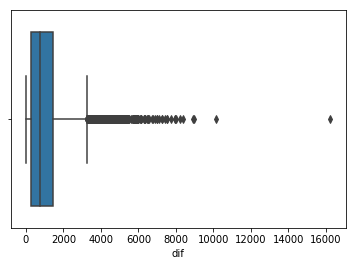

In [17]:
# gb_r is gb with the obviousresets removed
gb_r = gb[gb.dif < 20000]
# Show boxplot 
sns.boxplot(gb_r.dif);

<Container object of 7 artists>

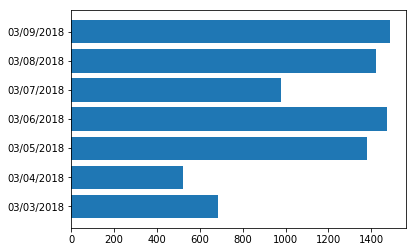

In [18]:
plt.barh(gb_r[:7].index.levels[1], gb_r[:7]["dif"])
#gb_r.index.levels[1]

In [19]:
gb_r.head(20)

min      max   dif
TS                    DATE                              
A002R05102-00-0059 ST 03/03/2018  6535802  6536487   685
                      03/04/2018  6536518  6537037   519
                      03/05/2018  6537057  6538436  1379
                      03/06/2018  6538452  6539924  1472
                      03/07/2018  6539944  6540923   979
                      03/08/2018  6540936  6542356  1420
                      03/09/2018  6542379  6543867  1488
A002R05102-00-0159 ST 03/03/2018  5865197  5865776   579
                      03/04/2018  5865810  5866249   439
                      03/05/2018  5866268  5867410  1142
                      03/06/2018  5867426  5868532  1106
                      03/07/2018  5868545  5869241   696
                      03/08/2018  5869250  5870309  1059
                      03/09/2018  5870330  5871528  1198
A002R05102-03-0059 ST 03/03/2018  1046134  1046393   259
                      03/04/2018  1046411  1046603   192
                      03/05/2018  1046611  1047087   476
                      03/06/2018  1047093  1047563   470
                      03/07/2018  1047582  1047959   377
                      03/08/2018  1047972  1048458   486